In [60]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../news/scraping_result/kr/2020_down1/2020_down1_(KR)Hankyung.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/kr/2020_down1/2020_down1_(KR)Tokenpost.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/kr/2020_down1/2020_down1_(KR)BlockMedia.csv', error_bad_lines=False))


In [61]:
data.loc[data['main article']=="Provided by Coinness",'main article'] = data.loc[data['main article']=="Provided by Coinness",'abstract']
data.loc[data['main article']=="Provided by 코인니스",'main article'] = data.loc[data['main article']=="Provided by 코인니스",'abstract']
data.loc[data['main article']=="",'main article'] = data.loc[data['main article']=="",'abstract']
# data.loc[data['main article']=='Provided by 코인니스','abstract']

In [62]:
text = data[['main article']].astype(str)
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\xa0",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)




In [63]:
from konlpy.tag import Mecab
mecab = Mecab()
text['main token article'] = text.apply(lambda row: mecab.morphs(row['main article']), axis=1)

In [64]:
text['main article']

0     \n\n\n\n\n서울 시내 가상화폐거래소에 걸린 시세판을 한 시민이  바라보고 있...
1     \n\n\n\n\n사진=PIXABAY\n\n                      ...
2     \n\n\n\n\n사진=PIXABAY\n\n                      ...
0     5일(현지시간) 프랑스 언론 레제코 보도에 따르면 프랑스 낭테르 상법원은 지난 달 ...
1     19일(현지시간) 암호화폐 전문 미디어 뉴스비티씨는 암호화폐 온체인 분석업체 글래스...
                            ...                        
85    26일(현지시각) 다우존스 지수는 전날 대비 1351.62포인트(6.38%) 급등한...
86    아이즈프로토콜의 웹사이트는 2019년 오픈소스 기반 블록체인 프로젝트 비즈니스를 시...
87    다우존스산업평균지수는 이날 913.21포인트(4.55%) 하락한 1만9173.98에...
88    기업은행이 코로나19 피해기업을 위한 금융지원을 확대하기로 했다. IBK기업은행(은...
89    전날 증시를 띄웠던 도널드 트럼프 행정부의 부양 기대감은 WHO의 팬데믹 선언과 함...
Name: main article, Length: 191, dtype: object

In [65]:
# 소문자 적용 , - 문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word.replace("-","") for word in x])
# 공백문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word for word in x if word])

In [66]:
text['pos tag'] = text.apply(lambda row: mecab.pos(row['main article']), axis=1)

In [67]:
text['pos tag']

0     [(서울, NNP), (시내, NNG), (가상, NNG), (화폐, NNG), (...
1     [(사진, NNG), (=, SY), (PIXABAY, SL), (기존, NNG),...
2     [(사진, NNG), (=, SY), (PIXABAY, SL), (코로나, NNP)...
0     [(5, SN), (일, NNBC), ((, SSO), (현지, NNG), (시간,...
1     [(19, SN), (일, NNBC), ((, SSO), (현지, NNG), (시간...
                            ...                        
85    [(26, SN), (일, NNBC), ((, SSO), (현지, NNG), (시각...
86    [(아이즈, NNP), (프로토콜, NNG), (의, JKG), (웹, NNG), ...
87    [(다우존스, NNG), (산업, NNG), (평균, NNG), (지수, NNG),...
88    [(기업, NNG), (은행, NNG), (이, JKS), (코로나, NNP), (...
89    [(전날, NNG), (증시, NNG), (를, JKO), (띄웠, VV+EP), ...
Name: pos tag, Length: 191, dtype: object

In [68]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('JKS','JX','JKO','JKB','EC','EP','SN','EP+EC','VV+ETM')])

In [69]:
text['main article']

0     [서울, 시내, 가상, 화폐, 거래소, 시세, 판, 시민, 바라보, 있, 다, .,...
1     [사진, =, PIXABAY, 기존, 금융, 시장, 의, 영향, 크, 받, 않, 는...
2     [사진, =, PIXABAY, 코로나, (, 신종, 코로나, 바이러스, ), 확산,...
0     [일, (, 현지, 시간, ), 프랑스, 언론, 레제, 코, 보도, 따르, 프랑스,...
1     [일, (, 현지, 시간, ), 암호, 화폐, 전문, 미디어, 뉴스, 비티, 씨, ...
                            ...                        
85    [일, (, 현지, 시각, ), 다우존스, 지수, 전날, 대비, ., 포인트, (,...
86    [아이즈, 프로토콜, 의, 웹, 사이트, 년, 오픈, 소스, 기반, 블록체인, 프로...
87    [다우존스, 산업, 평균, 지수, 이날, ., 포인트, (, ., %), 하락, 한...
88    [기업, 은행, 코로나, 피해, 기업, 금융, 지원, 확대, 하, 기, 했, 다, ...
89    [전날, 증시, 띄웠, 던, 도널드, 트럼프, 행정부, 의, 부양, 기대감, WHO...
Name: main article, Length: 191, dtype: object

In [70]:
import csv
stopword_list =[]
f = open('../../stopword/stop_ko.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

In [71]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 1])
print(tokenized_doc)
#tokenized_doc = text['main article']
#tokenized_doc

0     [서울, 시내, 가상, 화폐, 거래소, 시세, 시민, 바라보, 사진, 한경, DB,...
1     [사진, PIXABAY, 기존, 금융, 시장, 영향, 알려진, 가상, 화폐, 암호,...
2     [사진, PIXABAY, 코로나, 신종, 코로나, 바이러스, 확산, 주가, 국제, ...
0     [현지, 시간, 프랑스, 언론, 레제, 보도, 따르, 프랑스, 낭테르, 법원, 비트...
1     [현지, 시간, 암호, 화폐, 전문, 미디어, 뉴스, 비티, 암호, 화폐, 체인, ...
                            ...                        
85    [현지, 시각, 다우존스, 지수, 전날, 대비, 포인트, %), 급등, 마감, 다우...
86    [아이즈, 프로토콜, 사이트, 오픈, 소스, 기반, 블록체인, 프로젝트, 비즈니스,...
87    [다우존스, 산업, 평균, 지수, 이날, 포인트, %), 하락, 마감, 스탠더드, ...
88    [기업, 은행, 코로나, 피해, 기업, 금융, 지원, 확대, IBK, 기업, 은행,...
89    [전날, 증시, 띄웠, 도널드, 트럼프, 행정부, 부양, 기대감, WHO, 팬데, ...
Name: main article, Length: 191, dtype: object


In [72]:
article_contents = tokenized_doc.values.tolist()

In [73]:
len(tokenized_doc)

191

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [75]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [76]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [77]:
# article_contents_tfidf

In [78]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [79]:
word2id = defaultdict(lambda: 0)

In [80]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [81]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [82]:
len(tf_idf_result)

3997

In [83]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

3997


In [84]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [85]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.001*"TH" + 0.001*"최선" + 0.001*"체온" + 0.001*"스트리" + 0.001*"현물" + 0.001*"EGG" + 0.001*"측정" + 0.001*"수위"')
(1, '0.001*"노출" + 0.001*"pixabay" + 0.001*"넘겨" + 0.001*"놀자" + 0.001*"못할" + 0.001*"직장" + 0.001*"문의" + 0.001*"주도"')
(2, '0.001*"목표치" + 0.001*"폴로니" + 0.001*"관측" + 0.001*"손쉽" + 0.001*"악용" + 0.001*"랜덤" + 0.001*"이슈" + 0.001*"폐가"')
(3, '0.001*"산가" + 0.001*"초래" + 0.001*"크라" + 0.001*"+\'" + 0.001*"Kathleen" + 0.001*"XTZ" + 0.001*"희석" + 0.001*"점진"')


In [86]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [87]:
sentences = article_contents

In [88]:
length1 = 0
for setence in sentences :
    length1 += len(setence) 
length1

20644

In [89]:
from gensim.models import Word2Vec

In [90]:
model = Word2Vec(sentences, min_count=1)

In [91]:
len(model.wv.vocab)

3997

In [92]:
# model.wv.vocab

In [93]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [94]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [95]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [96]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [97]:
temp_cluster_result['cluster'] = assigned_clusters

In [98]:
temp_cluster_result['raw_data'] = X.tolist()

In [99]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [100]:
from sklearn.metrics import pairwise_distances

In [101]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [102]:
len(cosine_centroid_list)

3997

In [103]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [104]:
sum(temp_distance[3])

309.91893074978395

In [105]:
import scipy.spatial.distance as dist

In [106]:
dist.cosine(X[0],cosine_centroid_list[0])

0.3392128806045871

In [107]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.03568335158227629

In [108]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [109]:
len(tf_idf_value)

3997

In [110]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [111]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1245,"[0.0025810885708779097, 0.0015394079964607954,...",시켰,0,"[-0.00034357715, 0.00036612945, -4.749215e-05,...",0.392089,0.003184,1.388905,NaN
2194,"[-0.000751561252400279, 0.000467106350697577, ...",매칭,0,"[-0.00034357715, 0.00036612945, -4.749215e-05,...",0.407509,0.002123,1.405386,NaN
3255,"[-0.0004451428831089288, 0.004070374183356762,...",못해,0,"[-0.00034357715, 0.00036612945, -4.749215e-05,...",0.424652,0.002123,1.422529,NaN
2047,"[0.0008173393434844911, 0.003974208142608404, ...",오프라인,0,"[-0.00034357715, 0.00036612945, -4.749215e-05,...",0.426907,0.002123,1.424784,NaN
3298,"[-0.0045937723480165005, 0.0010677716927602887...",예방,0,"[-0.00034357715, 0.00036612945, -4.749215e-05,...",0.428765,0.002123,1.426642,NaN
568,"[0.0027743782848119736, -0.0003310682077426463...",자본,0,"[-0.00034357715, 0.00036612945, -4.749215e-05,...",0.458515,0.002123,1.456392,NaN
2332,"[-0.002239672699943185, 0.00022371867089532316...",정식,0,"[-0.00034357715, 0.00036612945, -4.749215e-05,...",0.475084,0.003184,1.471901,NaN
3769,"[0.0016049118712544441, 0.006575076840817928, ...",태계,0,"[-0.00034357715, 0.00036612945, -4.749215e-05,...",0.475153,0.001061,1.474091,NaN
409,"[0.0010688873007893562, 0.00020634481916204095...",주주,0,"[-0.00034357715, 0.00036612945, -4.749215e-05,...",0.501508,0.002123,1.499386,NaN
3564,"[-0.0039081452414393425, -0.002760457573458552...",케어,0,"[-0.00034357715, 0.00036612945, -4.749215e-05,...",0.508486,0.002123,1.506363,NaN


In [112]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 부정적

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
77,"[0.0031307663302868605, 0.008716369979083538, ...",절반,1,"[0.00025153175, 0.0012167116, -0.0008142199, 0...",0.295498,0.006368,1.289130,NaN
1863,"[0.0033269019331783056, 0.0003613793523982167,...",Yong,1,"[0.00025153175, 0.0012167116, -0.0008142199, 0...",0.393321,0.001061,1.392260,NaN
3196,"[-0.0009828706970438361, 0.006485035642981529,...",로프,1,"[0.00025153175, 0.0012167116, -0.0008142199, 0...",0.397996,0.002123,1.395873,NaN
3718,"[-0.00518363481387496, -0.0012554613640531898,...",지독,1,"[0.00025153175, 0.0012167116, -0.0008142199, 0...",0.399235,0.001061,1.398174,NaN
462,"[-0.0029410398565232754, 0.003981390502303839,...",비티,1,"[0.00025153175, 0.0012167116, -0.0008142199, 0...",0.405594,0.004245,1.401349,NaN
2166,"[-0.0024430882185697556, 0.00289982371032238, ...",합류,1,"[0.00025153175, 0.0012167116, -0.0008142199, 0...",0.412307,0.003184,1.409123,NaN
1731,"[0.003140003653243184, 0.004162738099694252, -...",공시,1,"[0.00025153175, 0.0012167116, -0.0008142199, 0...",0.422867,0.003184,1.419683,NaN
538,"[-0.0010263489093631506, 0.0006470283260568976...",투데이,1,"[0.00025153175, 0.0012167116, -0.0008142199, 0...",0.453286,0.005306,1.447980,NaN
3299,"[0.002094847848638892, 0.0053367456421256065, ...",권고,1,"[0.00025153175, 0.0012167116, -0.0008142199, 0...",0.455806,0.002123,1.453683,NaN
1024,"[0.00039019720861688256, 0.0013508932897821069...",극단,1,"[0.00025153175, 0.0012167116, -0.0008142199, 0...",0.457335,0.003184,1.454151,NaN


In [113]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3266,"[-0.005838562734425068, 0.006319965701550245, ...",세일,2,"[-0.0003155892, 0.0012227644, -0.00087852613, ...",0.386190,0.003184,1.383007,NaN
3583,"[0.0005051089683547616, 0.005350135266780853, ...",태양광,2,"[-0.0003155892, 0.0012227644, -0.00087852613, ...",0.395918,0.003184,1.392734,NaN
489,"[-0.0007870750268921256, 0.005843678489327431,...",다소,2,"[-0.0003155892, 0.0012227644, -0.00087852613, ...",0.397474,0.003184,1.394290,NaN
1264,"[-0.0035189848858863115, 0.001014361041598022,...",엔진,2,"[-0.0003155892, 0.0012227644, -0.00087852613, ...",0.414292,0.002123,1.412170,NaN
1800,"[-0.004441963043063879, 0.004236075561493635, ...",평화,2,"[-0.0003155892, 0.0012227644, -0.00087852613, ...",0.422361,0.002123,1.420239,NaN
1580,"[-0.005209038499742746, 0.005450638942420483, ...",처방,2,"[-0.0003155892, 0.0012227644, -0.00087852613, ...",0.425002,0.003184,1.421818,NaN
1595,"[0.003369673388078809, 0.0030939443968236446, ...",온스,2,"[-0.0003155892, 0.0012227644, -0.00087852613, ...",0.425670,0.003184,1.422486,NaN
2240,"[0.0008234582492150366, 0.0005781764630228281,...",회로,2,"[-0.0003155892, 0.0012227644, -0.00087852613, ...",0.425235,0.002123,1.423113,NaN
3384,"[-0.0023092448245733976, 0.005707897711545229,...",레오,2,"[-0.0003155892, 0.0012227644, -0.00087852613, ...",0.443797,0.001061,1.442736,NaN
2295,"[-0.00023620814317837358, 0.000918311940040439...",세부,2,"[-0.0003155892, 0.0012227644, -0.00087852613, ...",0.446728,0.002123,1.444605,NaN


In [114]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 거래소 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
25,"[-0.0318453311920166, 0.08670863509178162, -0....",비트코인,3,"[-0.0023075512, 0.007083567, -0.0020069922, -0...",0.001466,0.408596,0.592870,NaN
3,"[-0.03293292596936226, 0.08768370002508163, -0...",화폐,3,"[-0.0023075512, 0.007083567, -0.0020069922, -0...",0.001817,0.324754,0.677063,NaN
20,"[-0.028774509206414223, 0.08337168395519257, -...",암호,3,"[-0.0023075512, 0.007083567, -0.0020069922, -0...",0.001816,0.295038,0.706778,NaN
344,"[-0.017532262951135635, 0.07243774086236954, -...",코인,3,"[-0.0023075512, 0.007083567, -0.0020069922, -0...",0.002257,0.194216,0.808041,NaN
113,"[-0.026249023154377937, 0.06444337964057922, -...",달러,3,"[-0.0023075512, 0.007083567, -0.0020069922, -0...",0.002787,0.164500,0.838287,NaN
420,"[-0.027866214513778687, 0.0759364441037178, -0...",블록체인,3,"[-0.0023075512, 0.007083567, -0.0020069922, -0...",0.001837,0.156009,0.845828,NaN
1094,"[-0.02029525488615036, 0.07097787410020828, -0...",서비스,3,"[-0.0023075512, 0.007083567, -0.0020069922, -0...",0.002046,0.148580,0.853466,NaN
32,"[-0.017210744321346283, 0.06203114241361618, -...",자산,3,"[-0.0023075512, 0.007083567, -0.0020069922, -0...",0.002622,0.146458,0.856165,NaN
17,"[-0.022700142115354538, 0.08249249309301376, -...",시장,3,"[-0.0023075512, 0.007083567, -0.0020069922, -0...",0.001750,0.117803,0.883947,NaN
4,"[-0.02166072092950344, 0.060846373438835144, -...",거래소,3,"[-0.0023075512, 0.007083567, -0.0020069922, -0...",0.002087,0.112496,0.889591,NaN


In [115]:
y_km = temp_cluster_result['cluster'].values

In [116]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

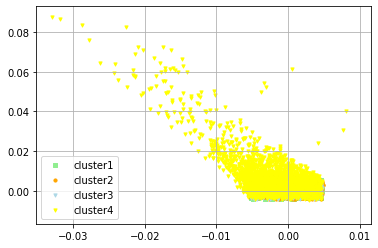

In [117]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [118]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 이슈

480

In [119]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 부정

551

In [120]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 인풀르

516

In [121]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 거래소돈

2450

In [122]:
temp_cluster_result['category'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [123]:
temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [124]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 5 # 이슈

In [125]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 2 #  부정

In [126]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 6 #  논쟁, 인플루언서

In [127]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 12 # 거래소돈

In [128]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [129]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [130]:
kmeans.inertia_

4.570585034446254

In [131]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[0 0 3 ... 0 0 0]


In [132]:
cluster_values= list(model.wv.vocab)

In [133]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-4.5705853


In [134]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [135]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.36969897


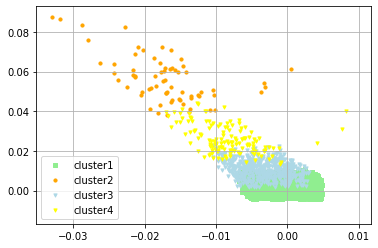

In [136]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [137]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [138]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [139]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [140]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [141]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [142]:
import scipy.spatial.distance as dist

In [143]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [144]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [145]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2553,"[-0.0042511397041380405, 0.0033314998727291822...",nan,0,"[-0.00056512345, 0.0018643753, -0.00066069077,...",0.029791,0.013797,1.015994,NaN
2886,"[-0.0027048042975366116, -0.000954785209614783...",진출,0,"[-0.00056512345, 0.0018643753, -0.00066069077,...",0.025313,0.003184,1.022129,NaN
431,"[-0.0002920745755545795, 0.0021903212182223797...",간주,0,"[-0.00056512345, 0.0018643753, -0.00066069077,...",0.026739,0.004245,1.022494,NaN
2783,"[0.001387936994433403, 0.002113828668370843, 0...",옵저버,0,"[-0.00056512345, 0.0018643753, -0.00066069077,...",0.029951,0.007429,1.022522,NaN
1405,"[-0.0012426604516804218, 0.005187185946851969,...",벤치,0,"[-0.00056512345, 0.0018643753, -0.00066069077,...",0.024863,0.002123,1.022741,NaN
2614,"[0.002893096534535289, -0.0012525038328021765,...",상속,0,"[-0.00056512345, 0.0018643753, -0.00066069077,...",0.027005,0.004245,1.022760,NaN
1892,"[-0.005416981875896454, 0.005785347428172827, ...",바란다,0,"[-0.00056512345, 0.0018643753, -0.00066069077,...",0.025977,0.003184,1.022793,NaN
1653,"[-0.001174888457171619, 0.004221824929118156, ...",못한,0,"[-0.00056512345, 0.0018643753, -0.00066069077,...",0.025057,0.002123,1.022934,NaN
11,"[-0.00282132625579834, 0.0010803625918924809, ...",신종,0,"[-0.00056512345, 0.0018643753, -0.00066069077,...",0.028244,0.005306,1.022938,NaN
2052,"[-0.0038390960544347763, 0.0003345929144416004...",맹점,0,"[-0.00056512345, 0.0018643753, -0.00066069077,...",0.025118,0.002123,1.022995,NaN


In [146]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 거래소 돈 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
25,"[-0.0318453311920166, 0.08670863509178162, -0....",비트코인,1,"[-0.017191371, 0.056272402, -0.016152233, -0.0...",0.228156,0.408596,0.819560,NaN
20,"[-0.028774509206414223, 0.08337168395519257, -...",암호,1,"[-0.017191371, 0.056272402, -0.016152233, -0.0...",0.197827,0.295038,0.902789,NaN
344,"[-0.017532262951135635, 0.07243774086236954, -...",코인,1,"[-0.017191371, 0.056272402, -0.016152233, -0.0...",0.106286,0.194216,0.912070,NaN
3,"[-0.03293292596936226, 0.08768370002508163, -0...",화폐,1,"[-0.017191371, 0.056272402, -0.016152233, -0.0...",0.243431,0.324754,0.918677,NaN
54,"[-0.016120057553052902, 0.06205291673541069, -...",가격,1,"[-0.017191371, 0.056272402, -0.016152233, -0.0...",0.032033,0.107190,0.924843,NaN
32,"[-0.017210744321346283, 0.06203114241361618, -...",자산,1,"[-0.017191371, 0.056272402, -0.016152233, -0.0...",0.073265,0.146458,0.926807,NaN
4,"[-0.02166072092950344, 0.060846373438835144, -...",거래소,1,"[-0.017191371, 0.056272402, -0.016152233, -0.0...",0.039541,0.112496,0.927044,NaN
16,"[-0.017820851877331734, 0.06449249386787415, -...",금융,1,"[-0.017191371, 0.056272402, -0.016152233, -0.0...",0.038092,0.105067,0.933024,NaN
12,"[-0.016463249921798706, 0.061269208788871765, ...",코로나,1,"[-0.017191371, 0.056272402, -0.016152233, -0.0...",0.039902,0.105067,0.934834,NaN
113,"[-0.026249023154377937, 0.06444337964057922, -...",달러,1,"[-0.017191371, 0.056272402, -0.016152233, -0.0...",0.100719,0.164500,0.936219,NaN


In [147]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1293,"[0.00017247760843019933, 0.012725358828902245,...",출처,2,"[-0.0032998906, 0.010495539, -0.0029084869, -0...",0.031950,0.021226,1.010725,NaN
793,"[-0.006263584829866886, 0.005762491840869188, ...",송금,2,"[-0.0032998906, 0.010495539, -0.0029084869, -0...",0.025955,0.014858,1.011097,NaN
1560,"[-0.0025937450118362904, 0.008159958757460117,...",니스,2,"[-0.0032998906, 0.010495539, -0.0029084869, -0...",0.028204,0.015919,1.012284,NaN
169,"[0.0003872837114613503, 0.015372366644442081, ...",이날,2,"[-0.0032998906, 0.010495539, -0.0029084869, -0...",0.034606,0.022287,1.012319,NaN
198,"[-0.0008228759979829192, 0.008894032798707485,...",일부,2,"[-0.0032998906, 0.010495539, -0.0029084869, -0...",0.026433,0.013797,1.012636,NaN
2624,"[-0.008433288894593716, 0.01357316318899393, -...",지정,2,"[-0.0032998906, 0.010495539, -0.0029084869, -0...",0.029945,0.016981,1.012964,NaN
546,"[0.0008027342846617103, 0.011509737931191921, ...",본격,2,"[-0.0032998906, 0.010495539, -0.0029084869, -0...",0.026067,0.012735,1.013332,NaN
868,"[-0.0018521328456699848, 0.013269944116473198,...",인원,2,"[-0.0032998906, 0.010495539, -0.0029084869, -0...",0.028732,0.014858,1.013874,NaN
1176,"[0.00015757263463456184, 0.010049925185739994,...",난이도,2,"[-0.0032998906, 0.010495539, -0.0029084869, -0...",0.030017,0.015919,1.014098,NaN
183,"[-0.005506064742803574, 0.008155875839293003, ...",com,2,"[-0.0032998906, 0.010495539, -0.0029084869, -0...",0.029047,0.014858,1.014189,NaN


In [148]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
111,"[-0.006624934263527393, 0.030019216239452362, ...",현지,3,"[-0.008426519, 0.026211798, -0.008094392, -0.0...",0.034821,0.054126,0.980696,NaN
845,"[-0.013581711798906326, 0.023977702483534813, ...",정보,3,"[-0.008426519, 0.026211798, -0.008094392, -0.0...",0.026376,0.031839,0.994538,NaN
613,"[-0.00998595915734768, 0.023347964510321617, -...",방식,3,"[-0.008426519, 0.026211798, -0.008094392, -0.0...",0.025417,0.030777,0.994639,NaN
145,"[-0.010343403555452824, 0.025004509836435318, ...",관계자,3,"[-0.008426519, 0.026211798, -0.008094392, -0.0...",0.030519,0.032900,0.997619,NaN
236,"[-0.008485537022352219, 0.02491861768066883, -...",발생,3,"[-0.008426519, 0.026211798, -0.008094392, -0.0...",0.026297,0.028655,0.997642,NaN
30,"[-0.00998420175164938, 0.026122143492102623, -...",폭락,3,"[-0.008426519, 0.026211798, -0.008094392, -0.0...",0.032773,0.035022,0.997751,NaN
209,"[-0.008894744329154491, 0.024406952783465385, ...",국내,3,"[-0.008426519, 0.026211798, -0.008094392, -0.0...",0.030294,0.031839,0.998455,NaN
672,"[-0.007809899747371674, 0.024511214345693588, ...",계획,3,"[-0.008426519, 0.026211798, -0.008094392, -0.0...",0.031560,0.032900,0.998660,NaN
460,"[-0.008457646705210209, 0.03198715299367905, -...",미디어,3,"[-0.008426519, 0.026211798, -0.008094392, -0.0...",0.032699,0.033961,0.998738,NaN
292,"[-0.010669990442693233, 0.023178735747933388, ...",중국,3,"[-0.008426519, 0.026211798, -0.008094392, -0.0...",0.028205,0.027593,1.000612,NaN


In [153]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #기타

3285

In [154]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #거래소 돈

68

In [155]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #이슈

509

In [156]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #이슈

135

In [157]:
temp_cluster_result1['category'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [158]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 13 # 기타

In [159]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 12 # 거래소,돈 

In [160]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 5 # 이슈

In [161]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 5 # 이슈  

In [162]:
temp_cluster_result1

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#,category,label
0,"[0.00139887526165694, 0.006495051085948944, -0...",서울,0,"[-0.00056512345, 0.0018643753, -0.00066069077,...",0.030413,0.003184,1.027229,NaN,2,13.0
1,"[0.00320648867636919, 0.0007829657406546175, 0...",시내,0,"[-0.00056512345, 0.0018643753, -0.00066069077,...",0.026162,0.002123,1.024040,NaN,2,13.0
2,"[-0.00873815268278122, 0.03204253688454628, -0...",가상,3,"[-0.008426519, 0.026211798, -0.008094392, -0.0...",0.049425,0.041390,1.008035,NaN,2,5.0
3,"[-0.03293292596936226, 0.08768370002508163, -0...",화폐,1,"[-0.017191371, 0.056272402, -0.016152233, -0.0...",0.243431,0.324754,0.918677,NaN,2,12.0
4,"[-0.02166072092950344, 0.060846373438835144, -...",거래소,1,"[-0.017191371, 0.056272402, -0.016152233, -0.0...",0.039541,0.112496,0.927044,NaN,2,12.0
...,...,...,...,...,...,...,...,...,...,...
3992,"[-0.0036697520408779383, 0.0006592919235117733...",모건,0,"[-0.00056512345, 0.0018643753, -0.00066069077,...",0.031391,0.002123,1.029268,NaN,2,13.0
3993,"[0.0032494289334863424, 0.0014315069420263171,...",체이스,0,"[-0.00056512345, 0.0018643753, -0.00066069077,...",0.031098,0.001061,1.030037,NaN,2,13.0
3994,"[0.002545558614656329, 0.001641788869164884, -...",밀렸,0,"[-0.00056512345, 0.0018643753, -0.00066069077,...",0.029416,0.001061,1.028354,NaN,2,13.0
3995,"[0.00296580558642745, -0.004465590231120586, -...",씨티,0,"[-0.00056512345, 0.0018643753, -0.00066069077,...",0.031308,0.001061,1.030247,NaN,2,13.0


In [163]:
temp_cluster_result1['Silhouette'] = 0.36969897
temp_cluster_result['Silhouette'] = 0.36969897

In [164]:
#temp_cluster_result1.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_euclidean.csv")
#temp_cluster_result.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_cosine.csv")

In [165]:
len(temp_cluster_result1)

3997

In [166]:
len(temp_cluster_result)

3997

In [167]:
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [168]:
temp_cluster_result1.to_csv("../cluster/ko_news/2020_down1/ko_news_2020_down1_euclidean.csv")
temp_cluster_result.to_csv("../cluster/ko_news/2020_down1/ko_news_2020_down1_cosine.csv")